In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
Base.metadata.create_all(engine)


In [8]:
session = Session(bind=engine)

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station



In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [70]:
engine.execute('SELECT * FROM MEASUREMENT').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [11]:
#view all dates to see what some of the values are
dates=session.query(Measurement.date).all()

In [12]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date


('2017-08-23')

In [13]:
most_recent_date[0]

'2017-08-23'

In [14]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.


recent_date=dt.date(2017, 8, 23)
new_date= recent_date -dt.timedelta(days=365)

print(new_date)

2016-08-23


In [31]:
results = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23').all()
results
rows = [{"Date": result[1], "Precip": result[0]} for result in results]
rows

[{'Date': '2016-08-23', 'Precip': 0.0},
 {'Date': '2016-08-24', 'Precip': 0.08},
 {'Date': '2016-08-25', 'Precip': 0.08},
 {'Date': '2016-08-26', 'Precip': 0.0},
 {'Date': '2016-08-27', 'Precip': 0.0},
 {'Date': '2016-08-28', 'Precip': 0.01},
 {'Date': '2016-08-29', 'Precip': 0.0},
 {'Date': '2016-08-30', 'Precip': 0.0},
 {'Date': '2016-08-31', 'Precip': 0.13},
 {'Date': '2016-09-01', 'Precip': 0.0},
 {'Date': '2016-09-02', 'Precip': 0.0},
 {'Date': '2016-09-03', 'Precip': 0.0},
 {'Date': '2016-09-04', 'Precip': 0.03},
 {'Date': '2016-09-05', 'Precip': None},
 {'Date': '2016-09-06', 'Precip': None},
 {'Date': '2016-09-07', 'Precip': 0.05},
 {'Date': '2016-09-08', 'Precip': 0.0},
 {'Date': '2016-09-09', 'Precip': 0.03},
 {'Date': '2016-09-10', 'Precip': 0.0},
 {'Date': '2016-09-11', 'Precip': 0.05},
 {'Date': '2016-09-12', 'Precip': 0.0},
 {'Date': '2016-09-13', 'Precip': 0.02},
 {'Date': '2016-09-14', 'Precip': 1.32},
 {'Date': '2016-09-15', 'Precip': 0.42},
 {'Date': '2016-09-16', 'Pr

In [42]:
# Convert your results into a pandas DataFrame with date as index.
df=pd.DataFrame(rows).set_index("Date")

x=len(df)

In [54]:
values=df["Precip"]
values
height=[value for value in values]
type(height[0])

float

<BarContainer object of 2230 artists>

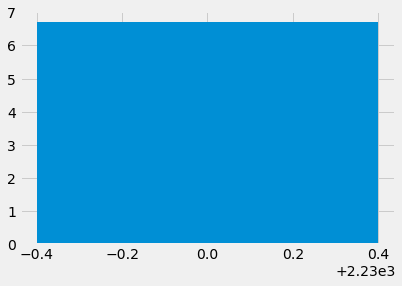

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
data=df['Precip']

plt.bar(x, height=height)

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Exploratory Station Analysis

In [61]:
# Query total number of stations in dataset
stations=session.query(Station.id).all()
stations


[(1), (2), (3), (4), (5), (6), (7), (8), (9)]

In [69]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

engine.execute('SELECT * FROM STATION').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [ ]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.


In [ ]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.


# Close session